In [1]:
fichier = "../solutions/solutions_gen_col.sol"

In [3]:
# reader des donnees pour modele compact


def importe_donnees_compact(): 
    data = []

    with open("../solutions/solutions_compact.sol", "r") as f: 
        for line in f: 
            line = line.strip().split(" ") # enlever espaces et \n 

            inst = int(line[0])
            relax = int(line[1])  # récupère les datas et les mettre au bon type
            temps = round(float(line[2]), 3) # arrondir a 3 chiffres apres virgule
            valeur = round(float(line[3]), 3)

            if line[1] == "1": #alors c'est une relaxation. Donc, pas de gap a récup
                gap = None

            elif line[1] == "0":  
                gap = round(float(line[4]), 3)

            else:
                print("erreur dans lecture, gap bizarre...")

            data.append((inst, relax, temps, valeur, gap)) # ajout des datas dans 1 structure 

    data.sort(key=lambda x: x[0]) # triage ordre croissant des numéros d'instance

    return data 

data = importe_donnees_compact()


In [4]:
# cellule permettant de parser le fichier solution pour les différentes gen col


def importe_donnes_CG(nom_fichier): 
    
    data_gen_col = {} # dictionnaire qui stockera les donnees 
    with open(nom_fichier, "r") as f: 
        for line in f: 
            
            line = line.strip().split(" ") # lecture des données 
            inst = int(line[0])
            choix = int(line[1])
            temps = round(float(line[2]), 3)
            val = round(float(line[3]), 3)
            if line[4] != -1: 
                alpha = float(line[4])
            else: 
                alpha = None 

            if inst not in data_gen_col: # si on avait pas encore traité cette instance 
                data_gen_col[inst] = {} # on ajoute sa clé, et on créer un dictionnaire vide pour stocker l'ensemble des données relatives à cette instance
            
            if choix not in data_gen_col[inst]: # mm raisonnement 
                data_gen_col[inst][choix] = []
            
            data_gen_col[inst][choix].append({ # enfin, on peut ajouter les données relatives à l'inst et au choix courant -> son temps, sa valeur et son alpha
                'temps': temps, 
                'val': val, 
                'alpha': alpha
            })

    data_gen_col = dict(sorted(data_gen_col.items(), key=lambda x: x[0]))
    return data_gen_col

def verifie_val_egales(dico): 

    for inst in dico.keys(): # pr chaque clé (qui est une instance)

        premier_choix = list(dico[inst].keys())[0] # on choisit la premiere comme référence 
        reference = dico[inst][premier_choix][0]["val"] # val sera la valeur de référence. On va regarder si y'en a une qui change 

        for choix in dico[inst].keys(): # pr chaque choix (0,1,2)
            for exec in dico[inst][choix]:  # le choix 2 comporte plusieurs exec car plusieurs alpha 

                if exec["val"] != reference: # si different de la valeur de reference 
                    print(f"erreur, instnce : {inst}, choix : {choix} a mené a une erreur")
                    return 
    
    print("toutes les valeurs sont correctes")     

def ecrit_latex_CG(nom_fichier): 

    alpha = [0.25, 0.5, 0.75, 0.9] # list des alphas 
    data_a_ecrire = importe_donnes_CG(nom_fichier)
    with open("tableau_CG.tex", "w") as f: 
        f.write("\\begin{tabular}{|c|c|c|c|c|c|c|c|} \n")
        f.write("\hline \n")
        f.write("Instance & Val & GC1 & GCDP & GCDPS(0.25) & GCDPS(0.50) & GCDPS(0.75) & GCDPS(0.9) \\\\")
        f.write("\hline \n")    
        
        for inst in data_a_ecrire.keys(): # pr chaque clé 
            for choix in range(3): 

                if choix != 2: # si pas de stabilisation:   
                    num_inst = str(inst)
                    val = str(data_a_ecrire[inst][choix][0]["val"])
                    temps = str(data_a_ecrire[inst][choix][0]["temps"])

                    if choix == 0: 
                        f.write(f"uniform\_{inst} & {val} & {temps} ") # ecrire l'instance et la val sur les deux premieres colonens
                    if choix == 1: 
                        f.write(f"& {temps}")

                if choix == 2: # si y'a stabilisation
                    for a in alpha: # pr chaque alpha 
                        for exec in data_a_ecrire[inst][choix]: # trouver son exécutions correspondant 
                            if exec["alpha"] == a: # si on est sur la bonne éxécution -> on écrit dans le latex

                                f.write(f"& {exec['temps']}")

            f.write("\\\\ \hline \n")

        f.write("\end{tabular}")
                    

test = importe_donnes_CG("solutions_gen_col.sol")
ecrit_latex_CG("solutions_gen_col.sol")


FileNotFoundError: [Errno 2] No such file or directory: 'solutions_gen_col.sol'

compact :  [2.219, 2.512, 3.229, 3.637, 6.189, 4.733, 7.965, 5.919, 8.371, 7.747, 5.78, 6.309, 12.753, 6.799, 5.844, 8.358, 11.622, 9.734, 8.671, 7.673, 11.029, 10.16, 10.165, 16.07, 10.392, 11.204, 9.158, 10.479, 8.76, 15.367, 9.853, 11.598, 15.55, 21.993, 15.198, 17.4, 14.513, 19.747, 13.753, 17.639, 18.97, 12.381, 12.047, 13.126]
CG :  [3.261, 4.413, 4.602, 5.871, 7.717, 7.027, 9.224, 8.594, 10.632, 10.294, 9.391, 9.513, 14.411, 10.405, 10.385, 11.656, 14.001, 12.686, 12.228, 11.207, 13.833, 13.799, 13.894, 18.384, 14.413, 15.113, 13.757, 14.778, 13.632, 18.442, 14.917, 16.305, 18.733, 24.101, 18.379, 20.432, 18.637, 22.896, 17.995, 20.909, 22.077, 17.333, 17.167, 18.472]


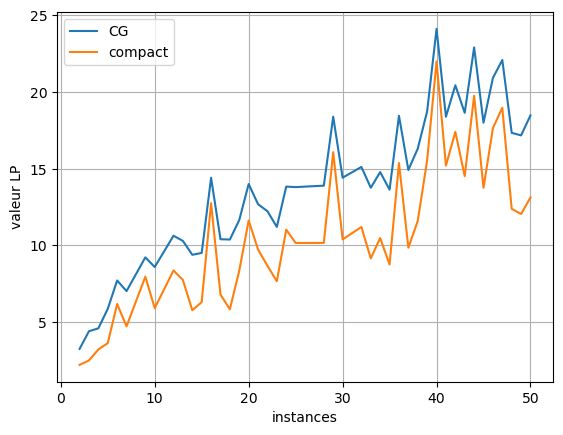

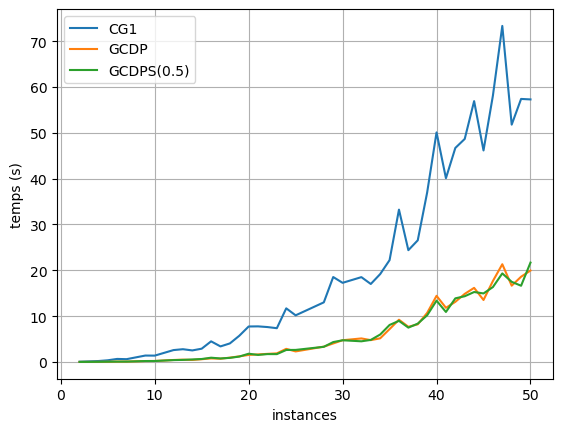

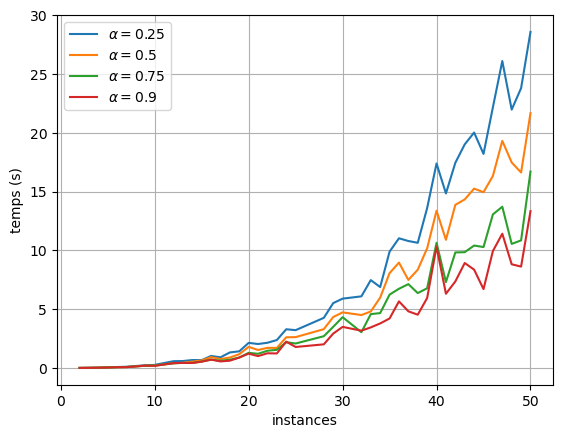

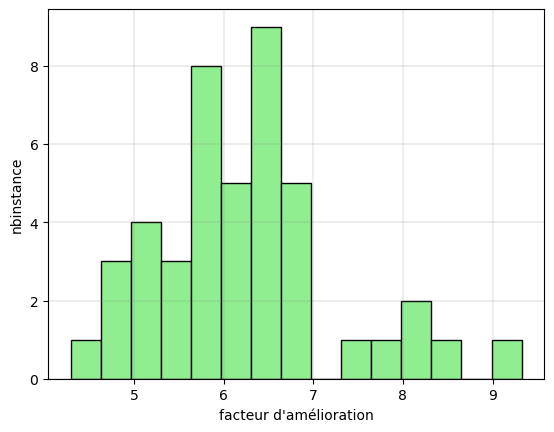

In [5]:
import matplotlib.pyplot as plt 


def trace_line_plot_temps_CG(nom_fichier): 

    datas = importe_donnes_CG(nom_fichier)

    temps_m0 = []
    temps_m1 = []
    temps_m2 = [] # pr celui ci, je choisis alpha = 0.5

    instances = sorted(datas.keys()) # on stocke les instances

    for inst in instances: 

        t0 = datas[inst][0][0]['temps']
        temps_m0.append(t0)

        t1 = datas[inst][1][0]['temps']
        temps_m1.append(t1)

        t2 = datas[inst][2][1]['temps'] # je choisis l'alpha 0.5
        temps_m2.append(t2)

    # maintenant que j'ai stocké les temps de chaque modèles dans le bon ordre : 

    x = instances 

    plt.plot(x, temps_m0, label = "CG1")
    plt.plot(x, temps_m1, label = "GCDP")
    plt.plot(x, temps_m2, label = "GCDPS(0.5)")

    plt.xlabel("instances")
    plt.ylabel("temps (s)")
    plt.legend()
    plt.grid(True)

    # plt.yscale("log")
    plt.show()



# fonction qui compare la qualité de la relaxation linéaire de colgen LP vs compact LP

def trace_line_plot_qualite_LP(nom_fichier): 

    datas = importe_donnees_compact()
    datas_CG = importe_donnes_CG(nom_fichier)

    val_LP_CG = []
    val_LP_compact = []
    x = []

    for i in range(1,len(datas), 2): 

        if datas[i][1] == 1: # si on est bien sur la relaxation
            val_LP_compact.append(datas[i][3])
            
            inst_courante = datas[i][0]
            val_LP_CG.append(datas_CG[inst_courante][0][0]["val"])
            x.append(inst_courante)
            
    print("compact : ", val_LP_compact)
    print("CG : ", val_LP_CG)

    # partie tracer graphique  

    plt.plot(x, val_LP_CG, label = "CG")
    plt.plot(x, val_LP_compact, label = "compact")

    plt.xlabel("instances")
    plt.ylabel("valeur LP")
    plt.legend()
    plt.grid(True)

    plt.show()

def trace_line_plot_compare_alphas(nom_fichier): 

    datas = importe_donnes_CG(nom_fichier) 

    temps_a1 = []
    temps_a2 = []
    temps_a3 = []
    temps_a4 = []

    instances = sorted(datas.keys()) # on stocke les instances
    for inst in instances: 

        t0 = datas[inst][2][0]['temps']
        temps_a1.append(t0)

        t1 = datas[inst][2][1]['temps']
        temps_a2.append(t1)

        t2 = datas[inst][2][2]['temps']
        temps_a3.append(t2)

        t3 = datas[inst][2][3]['temps']
        temps_a4.append(t3)

    x = instances 

    plt.plot(x, temps_a1, label = r"$\alpha = 0.25$")
    plt.plot(x, temps_a2, label = r"$\alpha = 0.5$")
    plt.plot(x, temps_a3, label = r"$\alpha = 0.75$")
    plt.plot(x, temps_a4, label = r"$\alpha = 0.9$")

    plt.xlabel("instances")
    plt.ylabel("temps (s)")
    plt.legend()
    plt.grid(True)

    # plt.yscale("log")
    plt.show()


def calcul_facteur_amelioration(nom_fichier): 

    data_gen_col = importe_donnes_CG(nom_fichier)

    taux = []

    instances = sorted(data_gen_col.keys()) # on stocke les instances
    for inst in instances:

        tgc = data_gen_col[inst][0][0]['temps'] # je compare la gc avec pricing classique et sans stab
        tgcs = data_gen_col[inst][2][3]['temps'] # pr voir jusqu'à combien on améliore les temps
        taux_courant = tgc/tgcs
        taux.append(taux_courant)


    # écriture graphique
    plt.hist(taux, bins = 15, color="lightgreen", edgecolor="black")

    plt.xlabel("facteur d'amélioration")
    plt.ylabel("nbinstance")
    plt.grid(color="grey", linewidth=0.2)

    plt.show() 

# la fonction en dessous va comparer les tmps de résolution avec heuristique de génération et sans heuristique de génération
# Ensuite, elle calcule la moyen sur les 6 modele différents de gen col chacun. 
# puis trace un bar plot afin de comparer
def trace_barres_tempsmoyens_colgen_comparaison(fichier1, fichier2): 

    data_fichier_1 = importe_donnes_CG(fichier1)
    data_fichier_2 = importe_donnes_CG(fichier2)

    temps_moyens_1 = []
    temps_moyens_2 = []

    instances = sorted(data_fichier_1.keys())
    for inst in instances: 

        val1 = 0
        val2 = 0

        for choix in data_fichier_1[inst].keys(): 
            for exec in data_fichier_1[inst][choix]: 

                val1 += exec["temps"]

        for choix in data_fichier_2[inst].keys(): 
            for exec in data_fichier_2[inst][choix]: 

                val2 += exec["temps"] 

        temps_moyens_1.append(val1/6) # car 6 modeles (0,1 et 2 avec 4 alphas)
        temps_moyens_2.append(val2/6)

    
    # écriture du graphique
    x = instances

    plt.bar(x, temps_moyens_2, label = "sans heuristique", color = "green")
    plt.bar(x, temps_moyens_1, label = "avec heuristique", color = "red")

    plt.xlabel("instances")
    plt.ylabel("temps moyen (s)")
    plt.legend()
    plt.grid(axis="y", linewidth = 0.2)

    plt.show()

    
def trace_line_plot_compact_vs_CG_temps(nom_fichier): 

    datas = importe_donnees_compact()
    datas_CG = importe_donnes_CG(nom_fichier)

    temps_LP_CG = []
    temps_LP_compact = []
    x = []

    for i in range(1,len(datas), 2): 

        if datas[i][1] == 1: # si on est bien sur la relaxation
            temps_LP_compact.append(datas[i][3])
            
            inst_courante = datas[i][0]
            temps_LP_CG.append(datas_CG[inst_courante][2][3]["temps"])
            x.append(inst_courante)
            
    print("compact : ", val_LP_compact)
    print("CG : ", val_LP_CG)

    # partie tracer graphique  

    plt.plot(x, val_LP_CG, label = "CG")
    plt.plot(x, val_LP_compact, label = "compact")

    plt.xlabel("instances")
    plt.ylabel("valeur LP")
    plt.legend()
    plt.grid(True)

    plt.show()


trace_line_plot_qualite_LP(fichier)
trace_line_plot_temps_CG(fichier)
trace_line_plot_compare_alphas(fichier)
calcul_facteur_amelioration(fichier)
# trace_barres_tempsmoyens_colgen_comparaison(fichier, "solutions_gen_col2.sol")

In [ ]:
# Cette cellule permet d'écrire le tableau de données de la formulation compacte en latex

with open("tableau_modele_compact.tex", "w") as f: 
    f.write("\\begin{tabular}{|c|c|c|c|c|c|} \n")
    f.write("\hline \n")
    f.write("Instance \n")
    f.write("& \multicolumn{3}{c|}{Formulation entière} \n")
    f.write("& \multicolumn{2}{c|}{Formulation relaxée} \\\\ \n")
    f.write("\cline{2-6} \n")
    f.write("& Valeur & Temps (s) & Gap & Valeur & Temps (s) \\\\ \hline \n")

    for i in range(0, len(data), 2): 
        
        num_inst = str(data[i][0])
        val_entier = str(data[i][3])
        temps_entier = str(data[i][2])
        gap = str(data[i][4])
        val_LP = str(data[i+1][3])
        temps_LP = str(data[i+1][2])
        
        f.write("uniform\_" + num_inst + "&" + val_entier + "&" + temps_entier + "&" + gap + "&" 
                + val_LP + "&" + temps_LP + "\\\\ \hline \n")
        
    f.write("\end{tabular}")
